We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1.

In [28]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats import mannwhitneyu
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

True

In [2]:
data = pd.read_csv('data/woorijip.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Woorijip,5,NaN,2024-04-23 17:08:09.579778
1,Woorijip,4,NaN,2024-04-23 16:08:09.586988
2,Woorijip,5,NaN,2024-04-23 16:08:09.590270
3,Woorijip,5,This place is like a ray of light when you mis...,2024-04-23 16:08:09.592151
4,Woorijip,4,Got the kimchi rice with egg and it was just a...,2024-04-19 16:08:09.595122
...,...,...,...,...
2499,Woorijip,5,NaN,2012-04-24 16:10:43.267177
2500,Woorijip,3,"quick, tasty, good food",2011-04-24 16:10:43.746238
2501,Woorijip,4,NaN,2011-04-24 16:10:43.751310
2502,Woorijip,4,NaN,2011-04-24 16:10:43.755745


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_85886/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Woorijip,5,NaN,2024
1,Woorijip,4,NaN,2024
2,Woorijip,5,NaN,2024
3,Woorijip,5,This place is like a ray of light when you mis...,2024
4,Woorijip,4,Got the kimchi rice with egg and it was just a...,2024
...,...,...,...,...
2499,Woorijip,5,NaN,2012
2500,Woorijip,3,"quick, tasty, good food",2011
2501,Woorijip,4,NaN,2011
2502,Woorijip,4,NaN,2011


Charts for ratings

<AxesSubplot:xlabel='rating'>

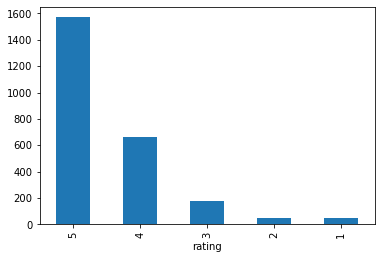

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

<AxesSubplot:title={'center':'Restaurant Ratings'}, ylabel='count'>

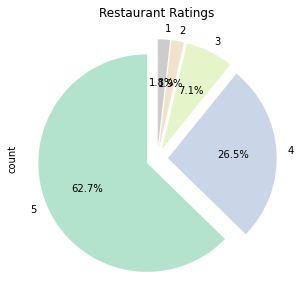

In [5]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 10,
    explode    = (0.1,0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Restaurant Ratings'
)

df['rating'].value_counts().plot.pie(**kwargs)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

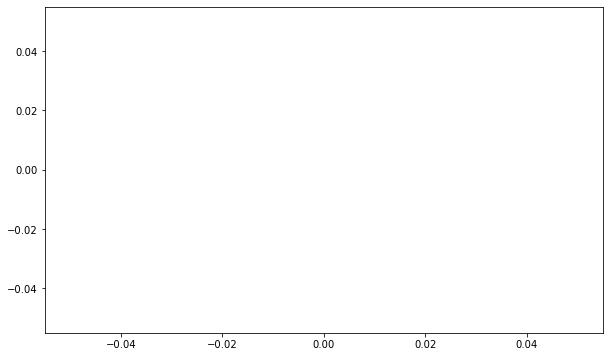

In [6]:
rating_counts = df.groupby(['published_at_date', 'rating']).size().unstack(fill_value=0)

total_ratings_per_year = rating_counts.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_ratings_per_year, marker='o', color='skyblue', linewidth=2.5)
plt.axvline(x=2016, color='blue', linestyle='--', label='Year 2016')


plt.title('Total Count of Ratings Over Time by Year')
plt.xlabel('Year')
plt.ylabel('Total Count of Ratings')
plt.tight_layout()
plt.show()

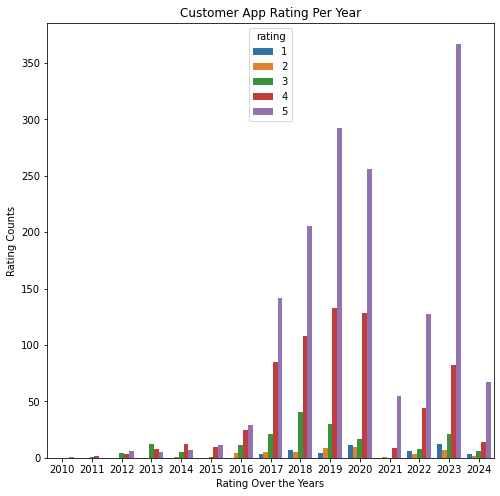

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [8]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_85886/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,<NA>
1,<NA>
2,<NA>
3,This place is like a ray of light when you mis...
4,Got the kimchi rice with egg and it was just a...
...,...
2499,<NA>
2500,"quick, tasty, good food"
2501,<NA>
2502,<NA>


In [9]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [10]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [11]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_85886/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Woorijip,5,<NA>,2024,
1,Woorijip,4,<NA>,2024,
2,Woorijip,5,<NA>,2024,
3,Woorijip,5,This place is like a ray of light when you mis...,2024,place ray light miss korean food travel variet...
4,Woorijip,4,Got the kimchi rice with egg and it was just a...,2024,kimchi rice egg alright reheat


In [12]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('food', 1200),
 ('korean', 580),
 ('place', 497),
 ('good', 425),
 ('great', 354),
 ('price', 345),
 ('eat', 225),
 ('buffet', 209),
 ('delici', 201),
 ('cheap', 195),
 ('quick', 172),
 ('lunch', 171),
 ('dish', 163),
 ('love', 151),
 ('select', 141),
 ('option', 140),
 ('varieti', 136),
 ('meal', 135),
 ('time', 124),
 ('rice', 123),
 ('restaur', 113),
 ('grab', 113),
 ('fast', 113),
 ('pay', 111),
 ('afford', 110),
 ('nice', 103),
 ('seat', 101),
 ('lot', 100),
 ('tast', 99),
 ('hot', 98),
 ('fresh', 94),
 ('spot', 92),
 ('tasti', 89),
 ('servic', 86),
 ('choos', 81),
 ('soup', 81),
 ('drink', 80),
 ('kimchi', 79),
 ('reason', 74),
 ('style', 73),
 ('cash', 70),
 ('recommend', 68),
 ('box', 67),
 ('staff', 66),
 ('made', 66),
 ('back', 66),
 ('qualiti', 63),
 ('pre', 63),
 ('friendli', 61),
 ('bite', 60)]

In [13]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_85886/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Woorijip,5,<NA>,2024,,1
1,Woorijip,4,<NA>,2024,,1
2,Woorijip,5,<NA>,2024,,1
3,Woorijip,5,This place is like a ray of light when you mis...,2024,place ray light miss korean food travel variet...,1
4,Woorijip,4,Got the kimchi rice with egg and it was just a...,2024,kimchi rice egg alright reheat,1
...,...,...,...,...,...,...
2499,Woorijip,5,<NA>,2012,,1
2500,Woorijip,3,"quick, tasty, good food",2011,quick tasti good food,0
2501,Woorijip,4,<NA>,2011,,1
2502,Woorijip,4,<NA>,2011,,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

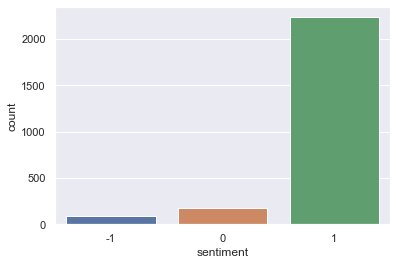

In [14]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [15]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_85886/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0       0.0000
1       0.0000
2       0.0000
3       0.2263
4       0.2500
         ...  
2499    0.0000
2500    0.4404
2501    0.0000
2502    0.0000
2503    0.4404
Name: review_sentiment, Length: 2504, dtype: float64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.8833865814696485

<AxesSubplot:xlabel='published_at_date', ylabel='review_sentiment'>

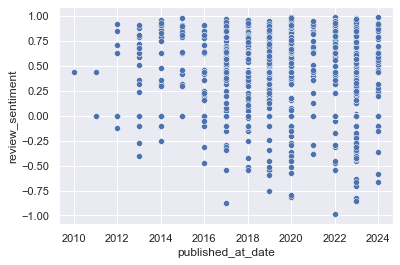

In [19]:
sns.scatterplot(data=df, x='published_at_date', y='review_sentiment')

<AxesSubplot:xlabel='published_at_date', ylabel='review_sentiment'>

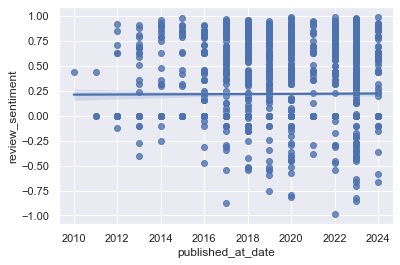

In [20]:
sns.regplot(x="published_at_date", y="review_sentiment", data=df)

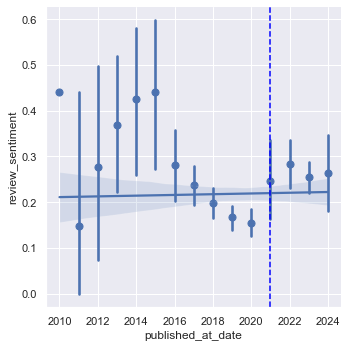

In [22]:
sns.lmplot(x="published_at_date", y="review_sentiment", data=df, x_estimator=np.mean)
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')

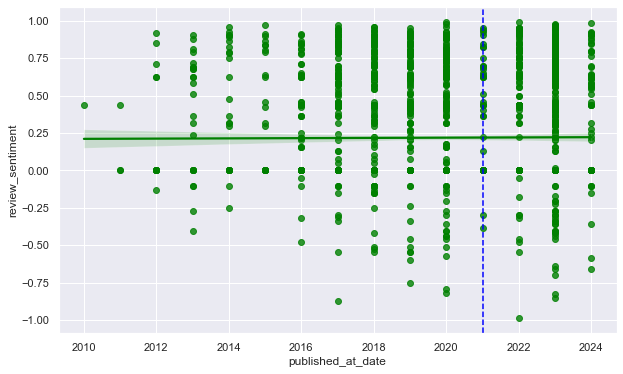

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='green')
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')

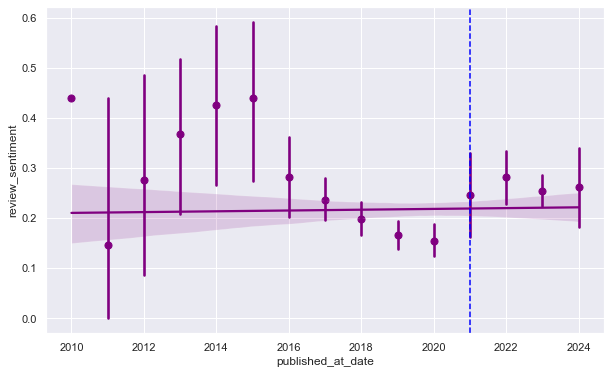

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='review_sentiment', marker='o', color='purple', x_estimator=np.mean)
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')

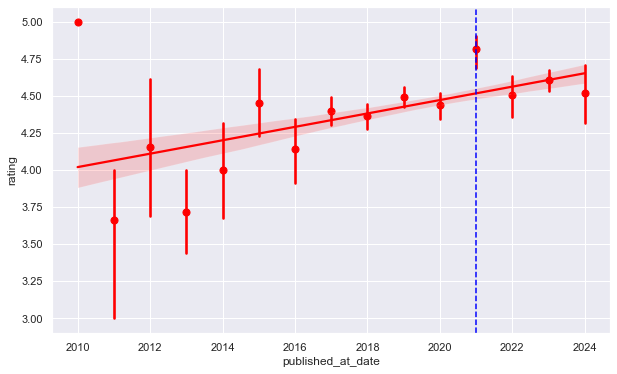

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='published_at_date', y='rating', marker='o', color='red', x_estimator=np.mean)
plt.axvline(x=2021, color='blue', linestyle='--', label='Year 2021')

In [32]:
# Wilcoxon rank-sum / Mann-whitney U Test
year = 2021

before_data = df[df['published_at_date'] < year]
after_data = df[df['published_at_date'] >= year]

u_stat, p_value_mw = mannwhitneyu(before_data['review_sentiment'], after_data['review_sentiment'])
print("Mann-Whitney U test - U-statistic:", u_stat, "p-value:", p_value_mw)

Mann-Whitney U test - U-statistic: 630201.5 p-value: 1.63975484201824e-05


In [27]:
# make altered data into csv file
df.to_csv('altdata/' + 'woorijip.csv', index=False)